тута задание 1


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import datasets
from sklearn.cluster import KMeans



In [4]:
pdf = pd.read_csv('https://raw.githubusercontent.com/Adelaaas/Data_science_basic_22-23_2/main/home_work_clustering/segmentation%20data.csv')
pdf.head(10)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
5,100000006,0,0,35,1,144848,0,0
6,100000007,0,0,53,1,156495,1,1
7,100000008,0,0,35,1,193621,2,1
8,100000009,0,1,61,2,151591,0,0
9,100000010,0,1,28,1,174646,2,0


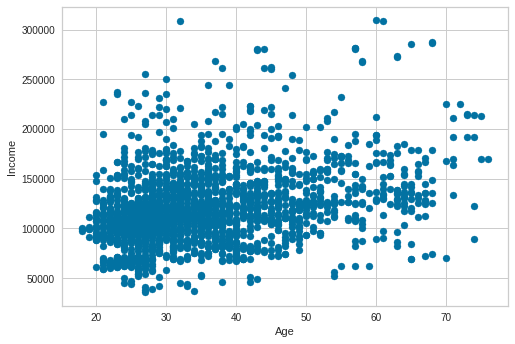

In [6]:
#1
plt.scatter(pdf['Age'], pdf['Income'])
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()
#Большинство людей имеют возраст от 20 до 40 и доход от 50000 до ~170000

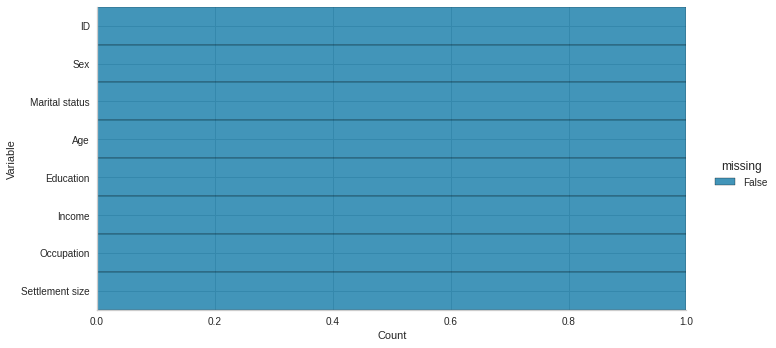

In [13]:
#2
sns.displot(data=pdf.isna().melt(value_name="missing"),
y="variable",
hue="missing",
multiple="fill",
aspect=2)
plt.xlabel("Count")
plt.ylabel("Variable")
plt.show()
#нет пустых значений

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


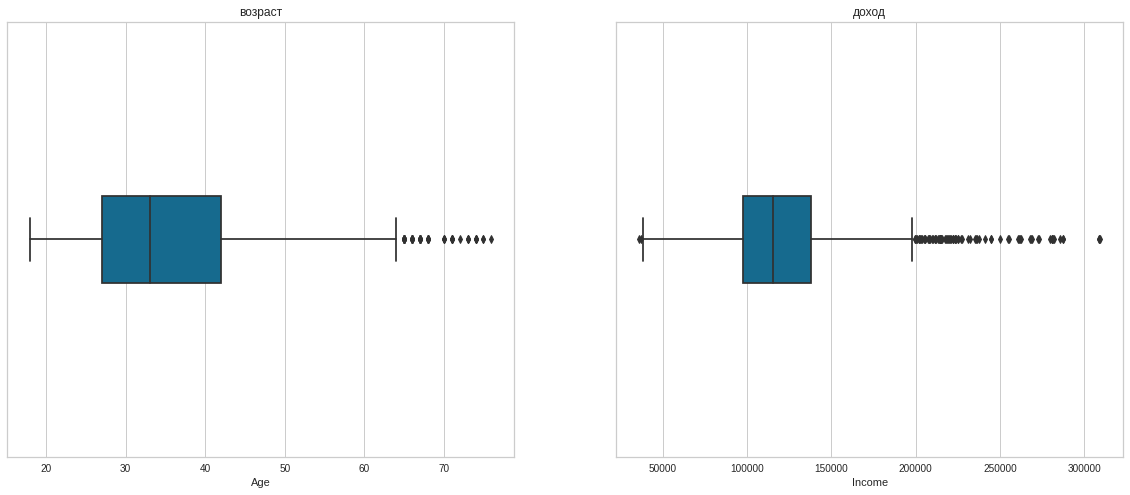

In [12]:
#3
fig, ax = plt.subplots(1,2,figsize=(20,8))
sns.boxplot(pdf['Age'], ax=ax[0], width=0.2)
sns.boxplot(pdf['Income'], ax=ax[1], width=0.2)
ax[0].set_title("возраст")
ax[1].set_title("доход")
plt.show()
#возраста от 64 и доходы от примерно 200к (до 30к тоже) - выбросы

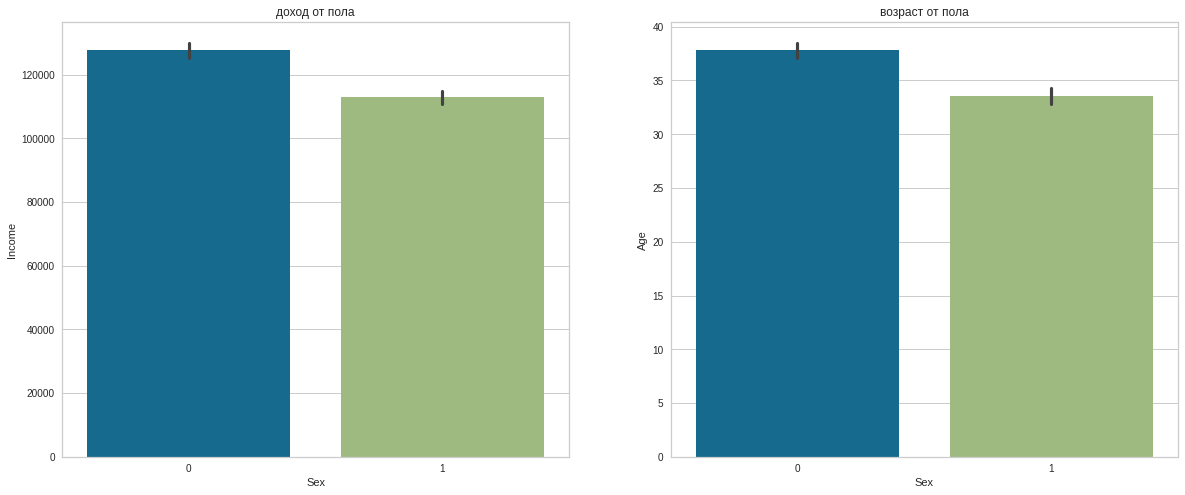

In [14]:
#4
fig, ax = plt.subplots(1, 2, figsize=(20,8))
sns.barplot(data=pdf, ax=ax[0], x="Sex", y="Income")
sns.barplot(data=pdf, ax=ax[1], x="Sex", y="Age")
ax[0].set_title("доход от пола")
ax[1].set_title("возраст от пола")
plt.show()
#у мужчин и возраст и доход в среднем выше

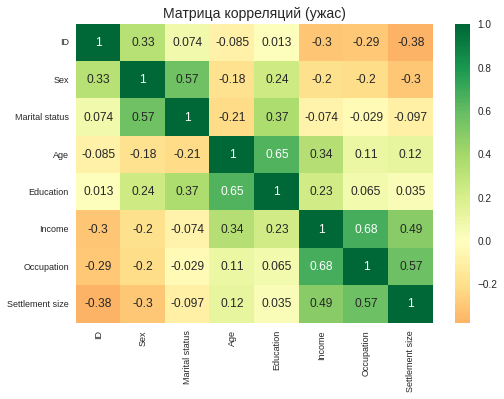

In [17]:
#5
plt.figure()
sns.heatmap(pdf.corr(), xticklabels=pdf.corr().columns, yticklabels=pdf.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Матрица корреляций (ужас)', fontsize=14)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()
#я не помню зачем она нужна

тута задание 2


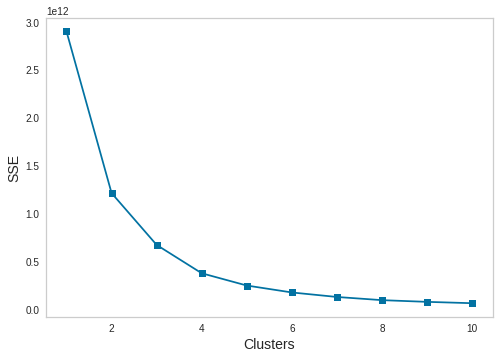

In [24]:
#1
SSE = []
pdf.drop(columns=['ID'])
plt.grid()
for i in range(1, 11):
  kmn = KMeans(i);
  kmn.fit(pdf)
  SSE.append(kmn.inertia_)
plt.plot(range(1,11), SSE, marker="s")
plt.xlabel("Clusters", fontsize = 14)
plt.ylabel("SSE", fontsize = 14)
plt.show()

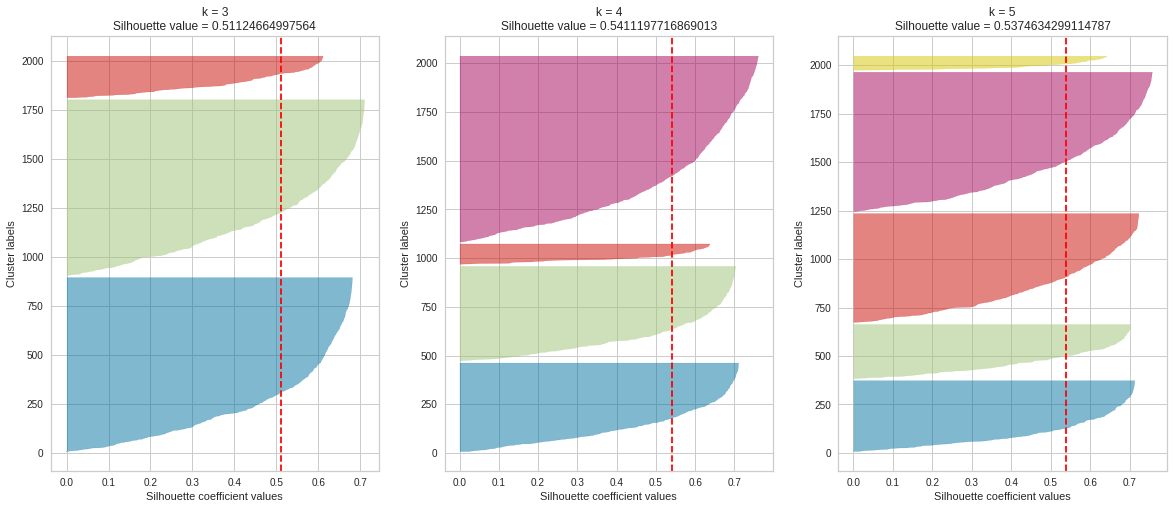

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(20,8))
for i in range(3,6):
    kmn = KMeans(i)
    kmn.fit(pdf.values)
    ax[i-3].set_title(f"k = {i}\nSilhouette value = {silhouette_score(pdf.values, kmn.predict(pdf.values), metric='euclidean')}")
    ax[i-3].set_xlabel("Silhouette coefficient values")
    ax[i-3].set_ylabel("Cluster labels")
    visualizer = SilhouetteVisualizer(kmn, colors='yellowbrick', ax=ax[i-3])
    visualizer.fit(pdf.values)

#оптимальное значение кластеров - 3

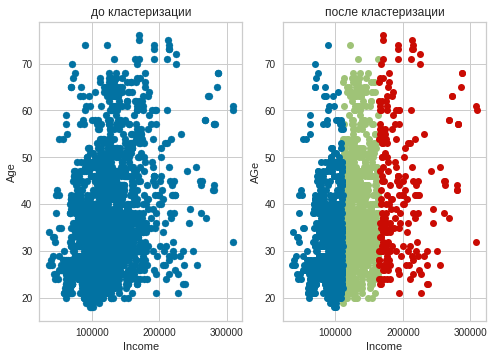

In [30]:
#2 
kmn = KMeans(3)
kmn.fit(pdf)
dfcl = pd.concat([pdf, pd.DataFrame(kmn.predict(pdf), columns = ["pred"])], axis = 1)
fig, ax = plt.subplots(1, 2)
ax[0].scatter(pdf['Income'], pdf['Age'])
ax[0].set_title("до кластеризации")
ax[0].set_xlabel("Income")
ax[0].set_ylabel("Age")
ax[1].plot(dfcl[dfcl["pred"] == 0]['Income'], dfcl[dfcl["pred"] == 0]['Age'], 'go')
ax[1].plot(dfcl[dfcl["pred"] == 1]['Income'], dfcl[dfcl["pred"] == 1]['Age'], 'ro')
ax[1].plot(dfcl[dfcl["pred"] == 2]['Income'], dfcl[dfcl["pred"] == 2]['Age'], 'bo')
ax[1].set_title("после кластеризации")
ax[1].set_xlabel("Income")
ax[1].set_ylabel("AGe")
plt.show()

# кластеризация произошла скорее по доходам, чем по возрасту